<a href="https://colab.research.google.com/github/DatNT146/Tuan13/blob/main/VN_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing


In [ ]:
#Truy cập vào gg drive
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Truy cập vào tập dữ liệu 
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 100 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Banh_cuon': 0,
 'Banh_mi': 1,
 'Bo_ne': 2,
 'Bot_loc': 3,
 'Bun_dau': 4,
 'Bun_rieu': 5,
 'Cha_lui': 6,
 'Com_chien': 7,
 'Com_tam': 8,
 'Ga_luoc': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=500,batch_size=200,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
16/16 [==============================] - 384s 23s/step - loss: 3.8262 - accuracy: 0.0920 - val_loss: 2.3050 - val_accuracy: 0.1200
Epoch 2/500
16/16 [==============================] - 5s 292ms/step - loss: 2.3022 - accuracy: 0.1060 - val_loss: 2.2918 - val_accuracy: 0.1200
Epoch 3/500
16/16 [==============================] - 5s 296ms/step - loss: 2.2951 - accuracy: 0.0800 - val_loss: 2.3010 - val_accuracy: 0.1100
Epoch 4/500
16/16 [==============================] - 5s 289ms/step - loss: 2.3056 - accuracy: 0.0940 - val_loss: 2.2990 - val_accuracy: 0.1600
Epoch 5/500
16/16 [==============================] - 5s 284ms/step - loss: 2.3046 - accuracy: 0.0960 - val_loss: 2.2995 - val_accuracy: 0.1000
Epoch 6/500
16/16 [==============================] - 5s 286ms/step - loss: 2.2967 - accuracy: 0.1100 - val_loss: 2.2771 - val_accuracy: 0.1100
Epoch 7/500
16/16 [==============================] - 5s 285ms/step - loss: 2.2622 - accuracy: 0.1380 - val_loss: 2.2101 - val_accuracy: 0.1700

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06545338034629822
Train Accuracy 0.9900000095367432


<function matplotlib.pyplot.show>

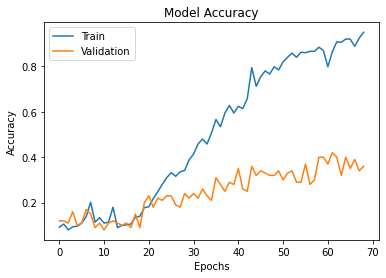

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Bai1.h5")
model_CNN=load_model('Bai1.h5')

Banh mi


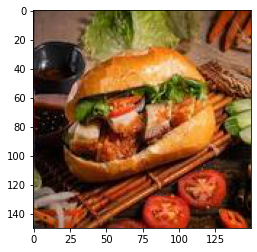

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Banhmi_t2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Banh cuon


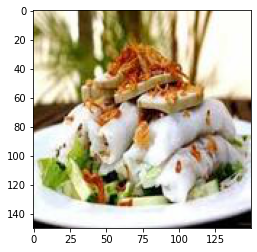

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Cuon_t2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Bo ne


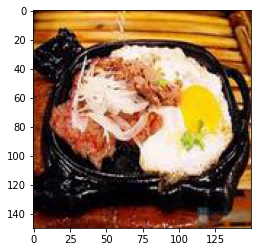

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Bo_t2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Bun dau


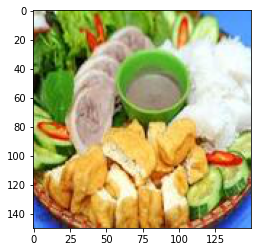

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Dau_t2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Ga luoc


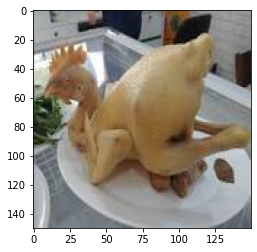

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Ga_t1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Cha lui


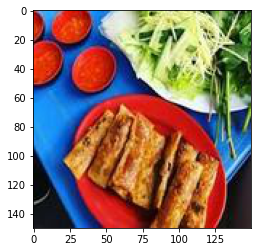

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Lui_t2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Com tam


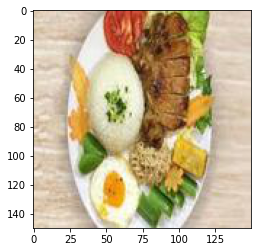

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Tam_t1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Bot loc


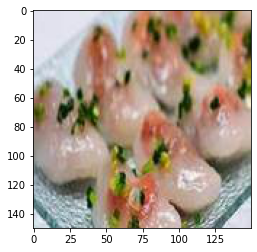

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Loc.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Bun rieu


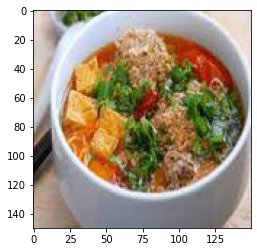

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Rieu.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)

Com chien


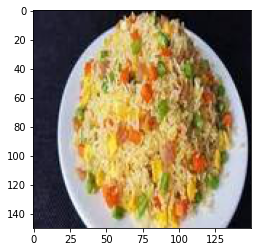

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Vietnamese_Food/Predict/Com.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Banh cuon'
if round(result[0][1])==1:
  prediction='Banh mi'
if round(result[0][2])==1:
  prediction='Bo ne'
if round(result[0][3])==1:
  prediction='Bot loc'
if round(result[0][4])==1:
  prediction='Bun dau'
if round(result[0][5])==1:
  prediction='Bun rieu'
if round(result[0][6])==1:
  prediction='Cha lui'
if round(result[0][7])==1:
  prediction='Com chien'
if round(result[0][8])==1:
  prediction='Com tam'
if round(result[0][9])==1:
  prediction='Ga luoc'
print(prediction)